In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import json
import re

In [3]:
# Strip newline carriage return and leading/trailing whitespace
def custom_strip(text):
    if isinstance(text, str):
        return text.strip("\n\r").strip()
    return text

In [2]:
data_file = Path("data/Tripfile_Beispieldaten.csv")
data = pd.read_csv(data_file, sep=";", index_col="id")

In [4]:
# Clean up data
data = data.map(custom_strip)
data["creation_time"] = pd.to_datetime(data["creation_time"])
data.to_csv("data/Tripfile_Beispieldaten_cleaned.csv", sep=";", index_label="id")

data.to_json("data/Tripfile_Beispieldaten_cleaned.json", orient="index", index=True)

In [5]:
list(data.columns)

['creation_time',
 'airline_code',
 'flight_number',
 'flight_suffix',
 'flight_date',
 'departure_airport',
 'user_name',
 'action_name',
 'header_line',
 'entry_details']

In [6]:
unique_actions = data.action_name.unique()

In [7]:
counts = pd.Series(data.action_name.value_counts(), index=unique_actions)

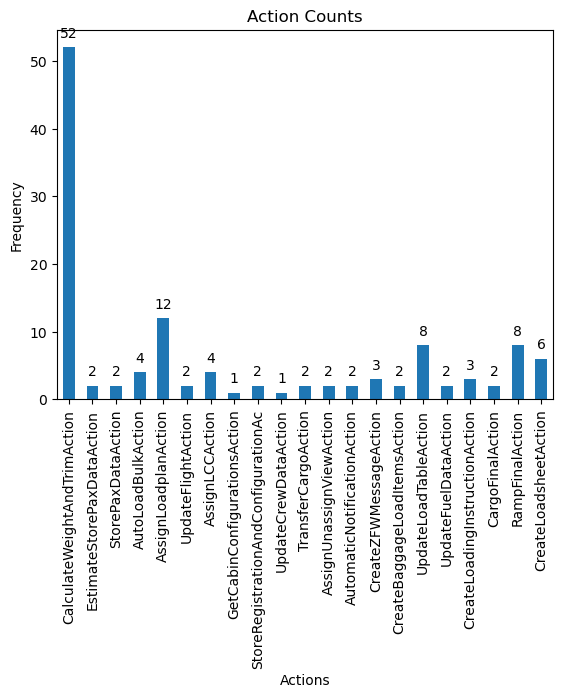

In [8]:
ax = counts.plot(kind="bar")
plt.title("Action Counts")
plt.xlabel("Actions")
plt.ylabel("Frequency")

for p in ax.patches:  # Loop over each bar
    ax.annotate(
        f"{p.get_height()}",  # Text to display
        (p.get_x() + p.get_width() / 2.0, p.get_height()),  # Position
        ha="center",  # Center horizontally
        va="bottom",  # Vertically align at the bottom
        xytext=(0, 5),  # Text offset
        textcoords="offset points",
    )

plt.show()

In [9]:
action_unique_messages = {}
action_uniques_count = pd.Series(index=unique_actions)
for action in data.action_name.unique():
    action_data = data[data.action_name == action]
    action_unique_messages[action] = list(action_data.entry_details.unique())
    action_uniques_count[action] = len(action_unique_messages[action])

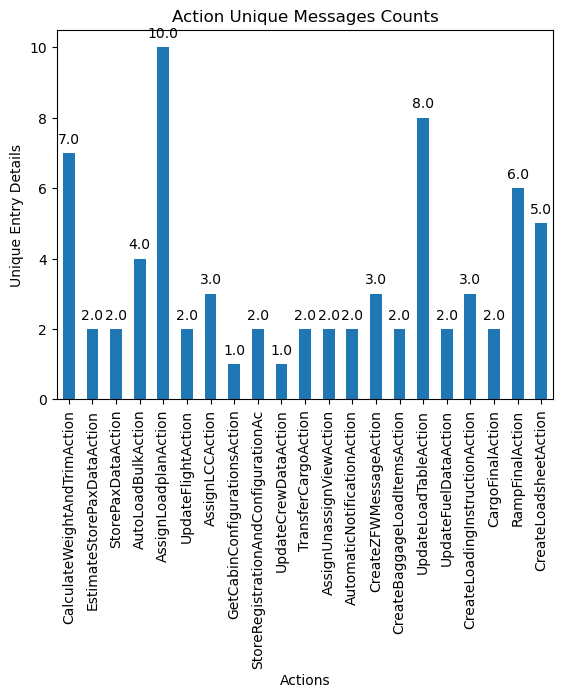

In [17]:
ax = action_uniques_count.plot(kind="bar")
plt.title("Action Unique Messages Counts")
plt.xlabel("Actions")
plt.ylabel("Unique Entry Details")

for p in ax.patches:  # Loop over each bar
    ax.annotate(
        f"{p.get_height()}",  # Text to display
        (p.get_x() + p.get_width() / 2.0, p.get_height()),  # Position
        ha="center",  # Center horizontally
        va="bottom",  # Vertically align at the bottom
        xytext=(0, 5),  # Text offset
        textcoords="offset points",
    )
plt.show()

# Create Patterns

In [10]:
json.dump(action_unique_messages, open("data/action_unique_messages.json", "w"))

In [11]:
def write_to_file(text: str, fileneame: str):
    with open(fileneame, "w") as file:
        file.write(text)

In [25]:
text = action_unique_messages["CalculateWeightAndTrimAction"][2]
write_to_file(text, "message.txt")

In [26]:
text

'START_WI weight               : 45102.00  KG               START_WI index                : 37.23                     \r\n DO_WI weight                  : 45516.00  KG               DO_WI index                   : 37.42                     \r\n PAX_WI weight                 : 0.00      KG               PAX_WI index                  : 0.00                               \r\n TOTAL_DEADLOAD_WI weight      : 45516.00  KG               TOTAL_DEADLOAD_WI index       : 37.42                               \r\n TOTAL_LOAD_WI                 : 0.00      KG               TOTAL_TRAFFIC_LOAD            : 0.00      KG              \r\n FUEL_INDEX                    : 0.00                      \r\n AZFW                          : 45516.00  KG               ATOW                          : 45516.00  KG                         \r\n ALAW                          : 45516.00  KG               ATXW                          : 45516.00  KG                                  \r\n AFT_LIMIT_ZFW                 : 

In [31]:
test_pattern = r"(\w+)\s+(weight|index)?\s*:\s*([0-9\.]+)\s*(KG)?"

# Find all matches in the string
matches = re.findall(test_pattern, text)

# Initialize an empty dictionary to hold the parsed data

In [32]:
matches

[('START_WI', 'weight', '45102.00', 'KG'),
 ('START_WI', 'index', '37.23', ''),
 ('DO_WI', 'weight', '45516.00', 'KG'),
 ('DO_WI', 'index', '37.42', ''),
 ('PAX_WI', 'weight', '0.00', 'KG'),
 ('PAX_WI', 'index', '0.00', ''),
 ('TOTAL_DEADLOAD_WI', 'weight', '45516.00', 'KG'),
 ('TOTAL_DEADLOAD_WI', 'index', '37.42', ''),
 ('TOTAL_LOAD_WI', '', '0.00', 'KG'),
 ('TOTAL_TRAFFIC_LOAD', '', '0.00', 'KG'),
 ('FUEL_INDEX', '', '0.00', ''),
 ('AZFW', '', '45516.00', 'KG'),
 ('ATOW', '', '45516.00', 'KG'),
 ('ALAW', '', '45516.00', 'KG'),
 ('ATXW', '', '45516.00', 'KG'),
 ('AFT_LIMIT_ZFW', '', '43.21', '')]

In [18]:
x = {
    "START_WI_weight": 45102.00,
    "START_WI_weight_unit": "KG",
    "START_WI_index": 37.23,
    "DO_WI_weight": 45516.00,
    "DO_WI_weight_unit": "KG",
    "DO_WI_index": 37.42,
    "PAX_WI_weight": 7500.00,
    "PAX_WI_weight_unit": "KG",
    "PAX_WI_index": 0.74,
    "TOTAL_DEADLOAD_WI_weight": 45516.00,
    "TOTAL_DEADLOAD_WI_weight_unit": "KG",
    "TOTAL_DEADLOAD_WI_index": 37.42,
    "TOTAL_LOAD_WI": 0.00,
    "TOTAL_LOAD_WI_unit": "KG",
    "TOTAL_TRAFFIC_LOAD": 7500.00,
    "TOTAL_TRAFFIC_LOAD_unit": "KG",
    "FUEL_INDEX": 0.00,
    "AZFW": 53016.00,
    "AZFW_unit": "KG",
    "ATOW": 53016.00,
    "ATOW_unit": "KG",
    "ALAW": 53016.00,
    "ALAW_unit": "KG",
    "ATXW": 53016.00,
    "ATXW_unit": "KG",
    "AFT_LIMIT_ZFW": 53.14,
}

In [ ]:
# The PATTERN is used to parse the text in messages.
# For every action (key), we specify exclude keywords for lines that don't contain the data we want to parse.
# And we specify a pattern to match the data we want to parse.
# With that pattern there is a regex and meta data.
# The regex extracts data in a tuple like way and the meta data specifies the key, value and unit positions in the tuple.
# TODO - Add more patterns for other actions. It's also possible to add more ways to pars data e.g. table like data.
PATTERN = {
    "CalculateWeightAndTrimAction": {
        "exclude": ["SingleAttributeDTO", "STATUS"],
        "pattern": {
            "regex": r"(\w+)\s+(weight|index)?\s*:\s*([0-9\.]+)\s*(KG)?",
            "meta": ["key", "key", "value", "unit"],
        },
    },
}

In [16]:
def parse(
    text: str,
    regex: str,
    meta: list[str],
):
    # Find all matches in the string
    matches = re.findall(regex, text)
    data_dict = {}

    key_positions = []
    value_position = -1
    unit_position = -1
    # Extract the positions of the keys, value and unit
    # Raise an error if there is more than one value or unit
    for i, item in enumerate(meta):
        if item == "key":
            key_positions.append(i)
        if item == "value":
            if not value_position == -1:
                raise ValueError("Only one value allowed")
            value_position = i
        if item == "unit":
            if not unit_position == -1:
                raise ValueError("Only one unit allowed")
            unit_position = i
    for match in matches:
        # Construct the key name
        key = "_".join([match[i] for i in key_positions if match[i]])
        # The numeric value
        value = float(match[value_position])
        data_dict[key] = value
        # If there is a unit specified and the unit is not empty add th unit to the dictionary
        if not unit_position == -1:
            if match[unit_position]:
                data_dict[f"{key}_unit"] = match[unit_position]

    return data_dict

In [35]:
data_dict = data.to_dict(orient="index")

In [48]:
# Every line / entry in the data dictionary is parsed
for key, value in data_dict.items():
    action = value["action_name"]
    message = value["entry_details"]
    # Only parse the message if the action is defined in the pattern dictionary
    if action in PATTERN.keys():
        action_pattern = PATTERN[action]
        # Only parse the message if the message does not contain any of the exclude words
        if not any(exclude in message for exclude in action_pattern["exclude"]):
            # Parse the message
            data_dict[key]["data"] = parse(
                text=message,
                regex=action_pattern["pattern"]["regex"],
                meta=action_pattern["pattern"]["meta"],
            )

NameError: name 'PATTERN' is not defined